In [32]:
#import libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#import and read data 
hotel_bookings = pd.read_csv(r"C:\Users\USER\Desktop\EXCEL SHENANIGANS\hotel_bookings.csv")
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
#drop some columns
hotel_bookings.drop(["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"], axis=1, inplace=True)
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_bookings.shape

(119390, 29)

In [5]:
#check for nulls
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_week_number               0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr             

In [6]:
#drop nulls in country column
hotel_bookings.dropna(subset = ["country"], axis=0, inplace=True)
hotel_bookings["country"]

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 118902, dtype: object

In [7]:
#drop nulls in agent column
hotel_bookings.dropna(subset=["agent"], axis=0, inplace=True)
hotel_bookings["agent"]

3         304.0
4         240.0
5         240.0
7         303.0
8         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 102896, dtype: float64

In [9]:
#missing numbers in company are equal to agent numbers
hotel_bookings["company"].fillna(hotel_bookings["agent"], inplace=True)
hotel_bookings["company"]

3         304.0
4         240.0
5         240.0
7         303.0
8         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: company, Length: 102896, dtype: float64

In [10]:
hotel_bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          2
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [11]:
hotel_bookings.dropna(subset=["children"], axis=0, inplace=True)

In [12]:
hotel_bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [13]:
hotel_bookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_week_number            int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           float64
days_in_waiting_list                int64
customer_type                     

In [19]:
#change some data types
hotel_bookings[["company", "agent"]] = hotel_bookings[["company", "agent"]].astype("int64")
hotel_bookings[["children"]] = hotel_bookings[["children"]].astype("int64")

In [20]:
hotel_bookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_week_number            int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                               int64
company                             int64
days_in_waiting_list                int64
customer_type                     

In [22]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000
mean,0.390314,111.740092,27.339155,0.978181,2.589655,1.899926,0.111231,0.007697,0.014034,0.077215,0.024365,0.201780,86.545532,86.670992,2.619579,104.679911,0.053035,0.605458
std,0.487823,107.681013,13.279990,1.003991,1.905941,0.490891,0.411982,0.097089,0.117631,0.758185,0.435759,0.624954,110.714259,110.863247,18.797440,50.021697,0.225359,0.799342
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,26.000000,17.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,0.000000,73.000000,0.000000,0.000000
50%,0.000000,79.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,169.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,53.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


In [23]:
hotel_bookings["hotel"].value_counts()

City Hotel      71181
Resort Hotel    31713
Name: hotel, dtype: int64

Text(0.5, 1.0, 'Hotel bins')

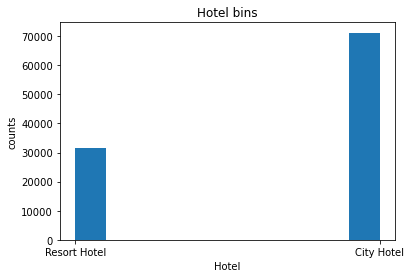

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(hotel_bookings["hotel"])
plt.xlabel("Hotel")
plt.ylabel("counts")
plt.title("Hotel bins")

Text(0.5, 1.0, 'Hotel Pie Chart')

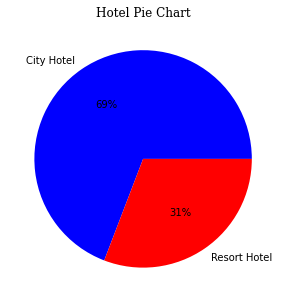

In [26]:
quantity = [71181, 31713]
hotels = ["City Hotel", "Resort Hotel"]
colors = ["blue", "red"]
plt.figure(figsize=(8,5))
plt.pie(quantity,labels=hotels, colors=colors, autopct='%.0f%%')
plt.title('Hotel Pie Chart', fontdict={'fontname':'serif','fontsize':12})

Text(0.5, 1.0, 'Meal bins')

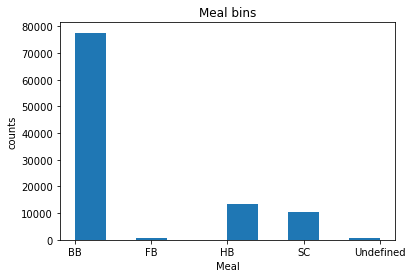

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(hotel_bookings["meal"])
plt.xlabel("Meal")
plt.ylabel("counts")
plt.title("Meal bins")

In [35]:
#save clean data
hotel_bookings.to_csv(r"C:\Users\USER\Downloads\hotel_clean.csv")
#files.download(r"C:\Users\USER\Downloads\hotel_clean.csv")